<a href="https://colab.research.google.com/github/Sarath-Haridas/Capstone_Project_3_Cardiovascular_Risk_prediction/blob/main/Work_in_progress_Cardiovascular_Risk_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts.**#
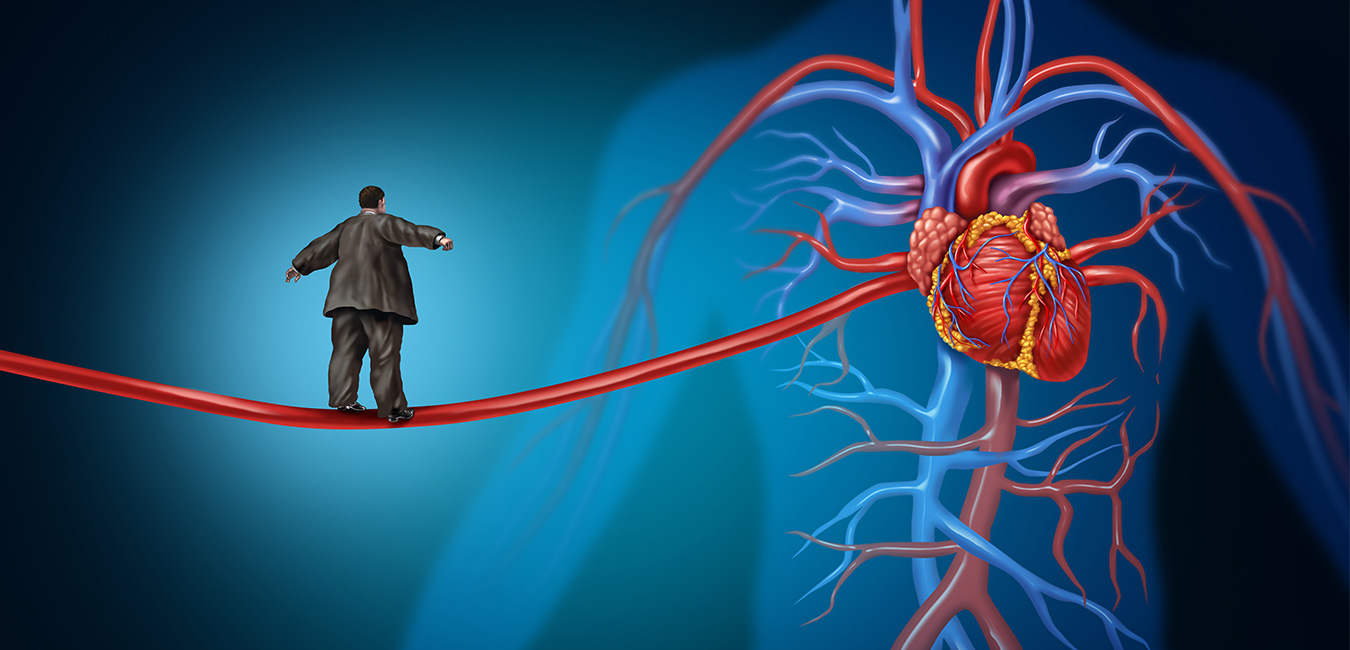


## <b> Data Description </b>

###**Demographic:**###
*  Sex: male or female("M" or "F")
* Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

###**Behavioral**###
* is_smoking: whether or not the patient is a current smoker ("YES" or "NO")
* Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

###**Medical(history)**###
* BP Meds: whether or not the patient was on blood pressure medication (Nominal)
* Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
* Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
* Diabetes: whether or not the patient had diabetes (Nominal)

###**Medical(current)**###
* Tot Chol: total cholesterol level (Continuous)
* Sys BP: systolic blood pressure (Continuous)
* Dia BP: diastolic blood pressure (Continuous)
* BMI: Body Mass Index (Continuous)
* Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though infact discrete, yet are considered continuous because of large number of possible values.)
* Glucose: glucose level (Continuous)

###**Predict variable (desired target)**###
* 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) - DV

##**The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes. Variables Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk factors.**##

#**Installing Modules**#

#**Importng the Libraries**#

In [2]:
# Importing required libraries
import pandas as pd
import numpy as np

# Importing Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
from sklearn.preprocessing import MinMaxScaler,StandardScaler



# Importing warning for ignore warnings 
import warnings
warnings.filterwarnings("ignore")

# Import Gridsearch cv & Randomsearch cv for hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split,GridSearchCV
# Importing Models
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Import evalution matrices
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report,roc_auc_score,roc_curve, auc,make_scorer

# Imports for visualizing Decision Tree
from sklearn.datasets import*
from sklearn.tree import*
from IPython.display import Image,display_svg,SVG
from sklearn import tree
from imblearn.combine import SMOTETomek



In [3]:
#Mounting the drive
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [4]:
#Importing Dataset to create dataframe
heart_df = pd.read_csv('/content/drive/MyDrive/Capstone_Project_3_Cardiovascular_Risk_Prediction/data_cardiovascular_risk.csv')

In [5]:
#checking the shape of dataframe
heart_df.shape

(3390, 17)

In [6]:
#checking top 5 rows of data
heart_df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [7]:
#checking bottom 5 rows of data
heart_df.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [8]:
#Dropping the id column because it not so important for our analysis
heart_df.drop(columns=['id'], inplace=True)

In [9]:
#Checking deatils about the data
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3303 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3368 non-null   float64
 5   BPMeds           3346 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3352 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3376 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3086 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 423.9+ KB


In [10]:
#Checking all the columns of dataset
print(f'All the columns in the dataset:')
heart_df.columns

All the columns in the dataset:


Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [11]:
#Checking the Null/Missing values
heart_df.isnull().sum()

age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [12]:
#checking the description of dataset
heart_df.describe(include = 'all')

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3303.000000,3390,3390,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
unique,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,F,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1923,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,49.542183,1.970936,NaN,NaN,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,8.592878,1.019081,NaN,NaN,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,32.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,42.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,49.000000,2.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,56.000000,3.000000,NaN,NaN,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000


#**Missing value treatment**#

In [13]:
# Missing data counts and percentage
missing = heart_df.columns[heart_df.isnull().any()].tolist()

print('Missing Data Count')
print(heart_df[missing].isnull().sum().sort_values(ascending = False))
print('--'*12)
print('Missing Data Percentage')
print(round(heart_df[missing].isnull().sum().sort_values(ascending = False)/len(heart_df)*100,2))

Missing Data Count
glucose       304
education      87
BPMeds         44
totChol        38
cigsPerDay     22
BMI            14
heartRate       1
dtype: int64
------------------------
Missing Data Percentage
glucose       8.97
education     2.57
BPMeds        1.30
totChol       1.12
cigsPerDay    0.65
BMI           0.41
heartRate     0.03
dtype: float64


In [14]:
#replace null values with median
for col in ['glucose', 'education', 'BPMeds', 'totChol', 'cigsPerDay', 'BMI', 'heartRate']:
  heart_df[col]= heart_df[col].fillna(heart_df[col].median())

In [15]:
#Checking the Null/Missing values
heart_df.isnull().sum()

age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

#**Exploratory Data Analysis**#

In [16]:
#Checking for unique values
heart_df.nunique()

age                  39
education             4
sex                   2
is_smoking            2
cigsPerDay           32
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             240
sysBP               226
diaBP               142
BMI                1259
heartRate            68
glucose             132
TenYearCHD            2
dtype: int64

In [17]:
# Lets check the discrete and continuous features
categorical_features = [i for i in heart_df.columns if heart_df[i].nunique()<=4]
numeric_features = [i for i in heart_df.columns if i not in categorical_features]

print(categorical_features)
print(numeric_features)

['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']
['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']


#**Cleaning and Manipulating Dataset**#

In [18]:
#Creating a copy of dataset
df = heart_df.copy()

In [19]:
#checking for duplicates
print(len(df[df.duplicated()]))

0


In [20]:
#checking unique values with thier counts of categorical values
categorical_features

['education',
 'sex',
 'is_smoking',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'TenYearCHD']

In [21]:
print(df['education'].value_counts())

1.0    1391
2.0    1077
3.0     549
4.0     373
Name: education, dtype: int64


In [22]:
print(df['prevalentHyp'].value_counts())

0    2321
1    1069
Name: prevalentHyp, dtype: int64


In [23]:
print(df['prevalentStroke'].value_counts())

0    3368
1      22
Name: prevalentStroke, dtype: int64


In [24]:
print(df['BPMeds'].value_counts())

0.0    3290
1.0     100
Name: BPMeds, dtype: int64


In [25]:
print(df['is_smoking'].value_counts())

NO     1703
YES    1687
Name: is_smoking, dtype: int64


In [26]:
print(df['sex'].value_counts())

F    1923
M    1467
Name: sex, dtype: int64


In [27]:
print(df['diabetes'].value_counts())

0    3303
1      87
Name: diabetes, dtype: int64


In [28]:
print(df['TenYearCHD'].value_counts())

0    2879
1     511
Name: TenYearCHD, dtype: int64


Here we are encoding two variables 'sex' and 'is_smoking'

In [29]:
# Defining a label encoder based on above data
encoder = {'sex':{'M': 1, 'F': 0}, 'is_smoking':{'NO':0, 'YES':1}}

In [30]:
#Label encoding
df = df.replace(encoder)

In [31]:
#now check the data
df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,2.0,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,36,4.0,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


<b> Here we can clearly see that all the features are numerical in nature now.

#**Handling Outliers**#

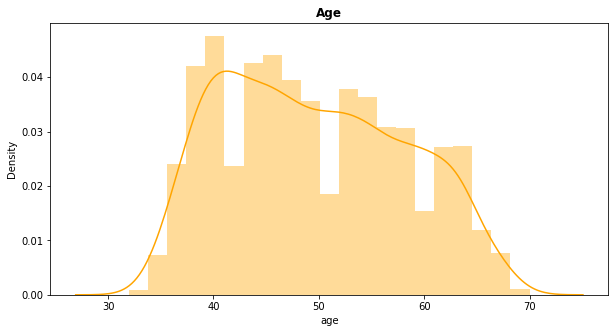

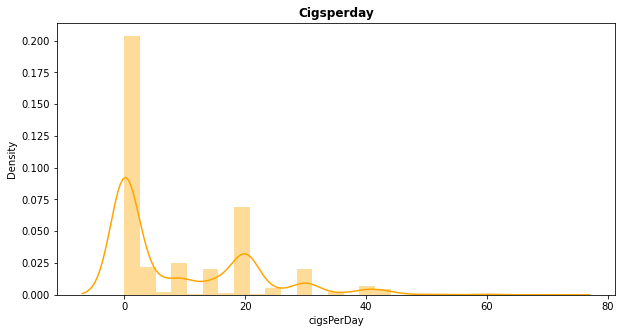

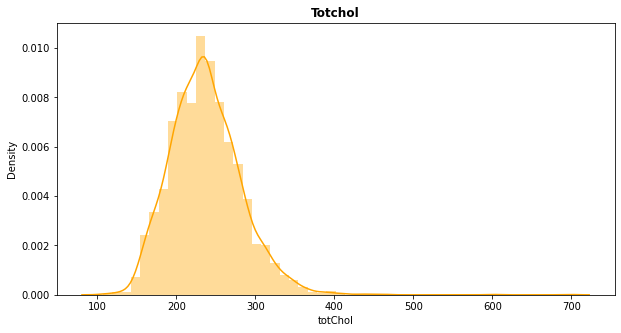

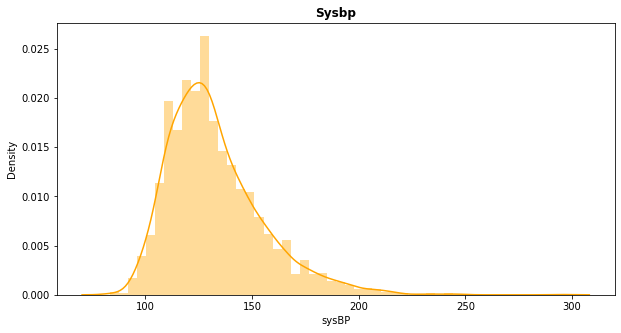

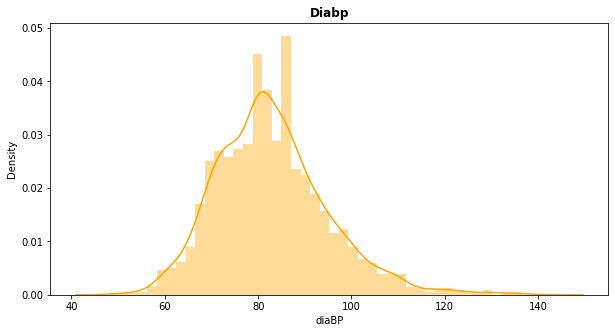

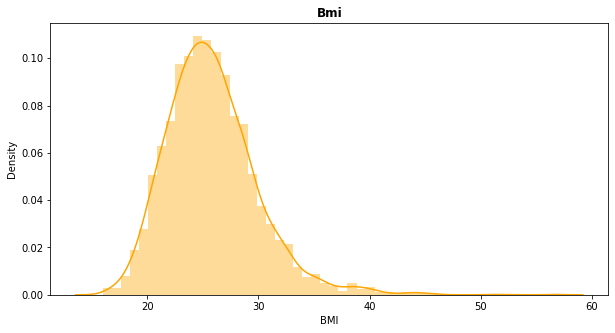

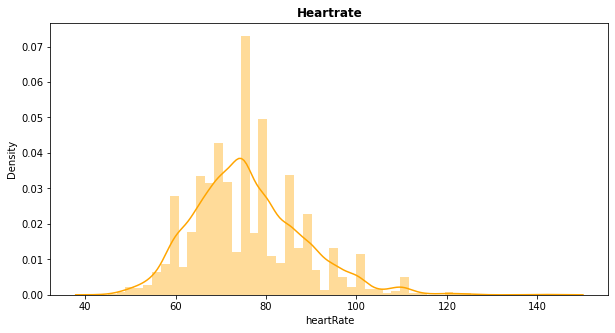

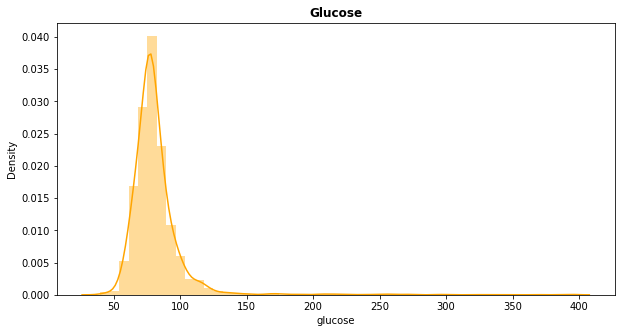

In [32]:
# Visualizing the distributions in distplot.

for column in numeric_features:
  #plt.subplot(4, 4, n+1)
  plt.figure(figsize=(10,5))
  sns.distplot(heart_df[column], color ='orange')
  plt.title(f'{column.title()}',weight='bold')
  #plt.tight_layout()

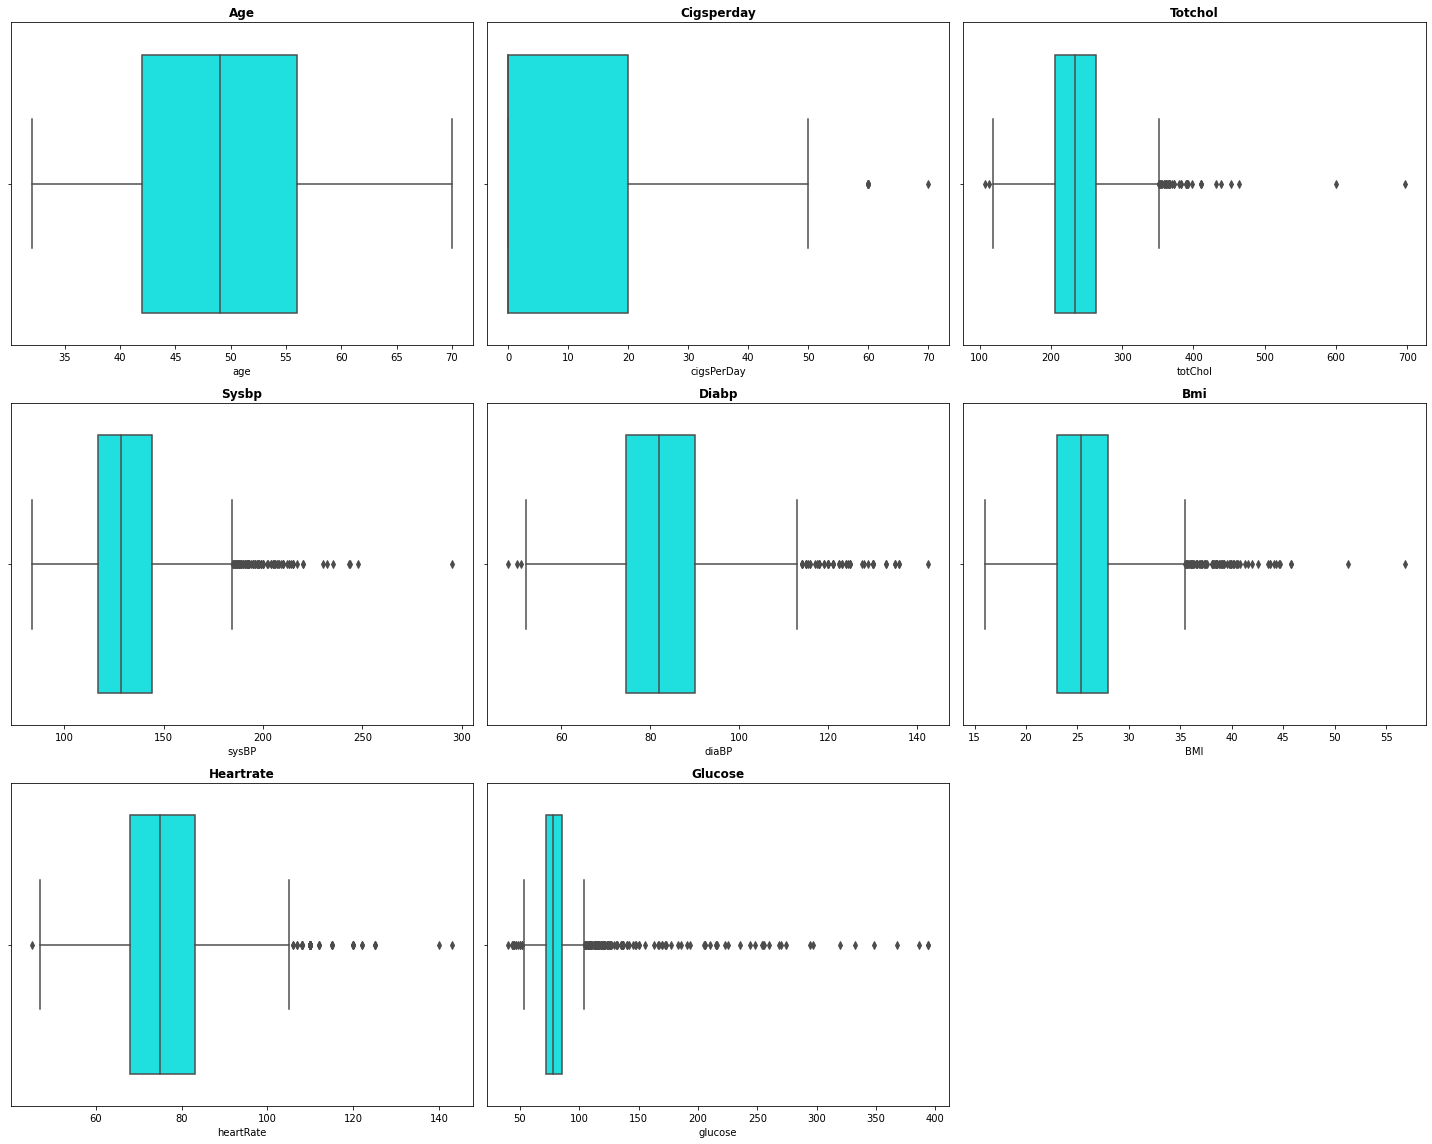

In [33]:
# Visualizing the distributions in boxplot.
plt.figure(figsize = (20,16))
for n,column in enumerate(numeric_features):
  plt.subplot(3,3, n+1)
  sns.boxplot(heart_df[column], color = 'cyan')
  plt.title(f'{column.title()}', weight = 'bold')
  plt.tight_layout()

<b> Visualization is the easiest way to have an inference about the overall data and the outliers.

 * We can see that, the distribution is skewed for some variables/features.
 * Outliers are also present in most of the features.
 * We should remove/handle them.

##**Removing Outliers by standard Methods and plotting graphs**##

In [34]:
#Using IQR method to define inliner
for col in numeric_features:
  q1, q3, median = df[col].quantile([0.25,0.75,0.5])
  lower_limit = q1 - 1.5*(q3-q1)
  upper_limit = q3 + 1.5*(q3-q1)
  #removing outliers with median value
  df[col] = np.where(df[col] > upper_limit, median,np.where(df[col] < lower_limit,median,df[col]))

 <b> Here we are replacing the outliers with the median value of the respective features.

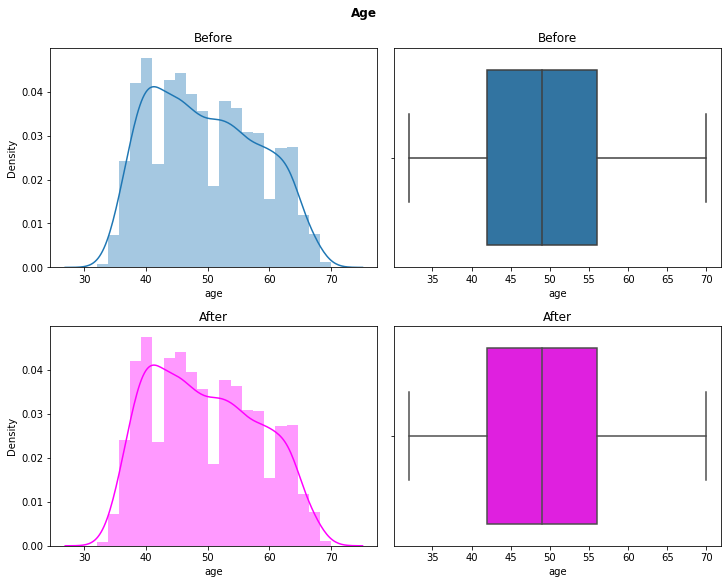

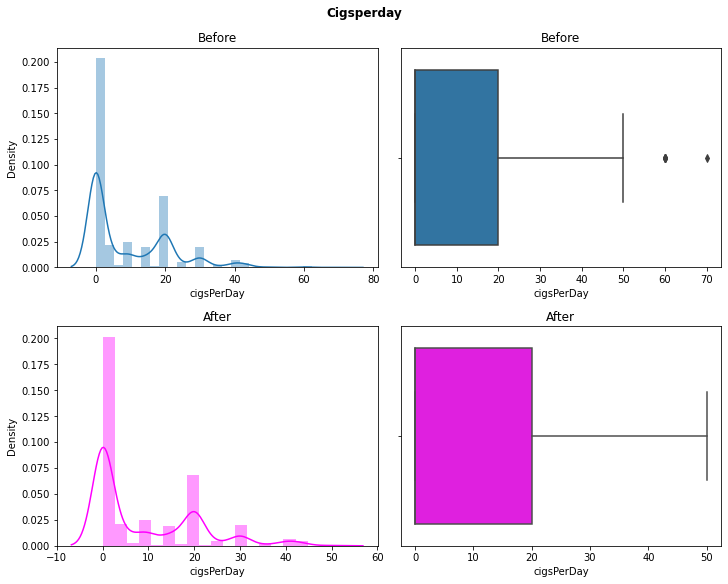

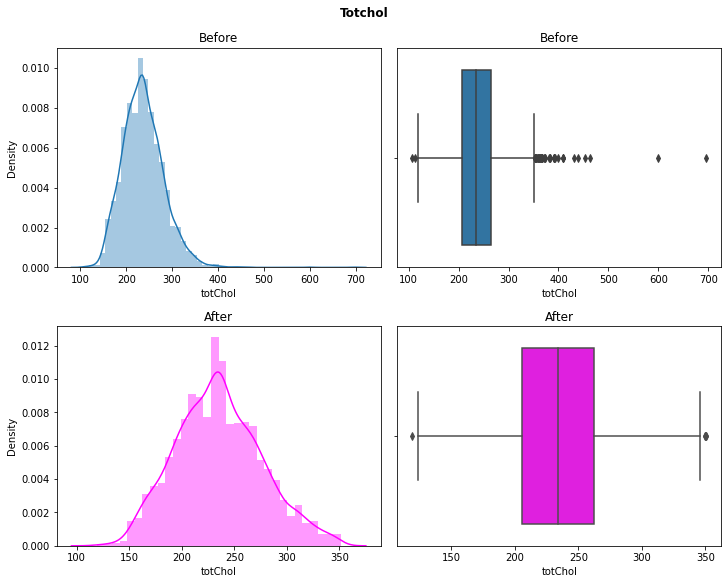

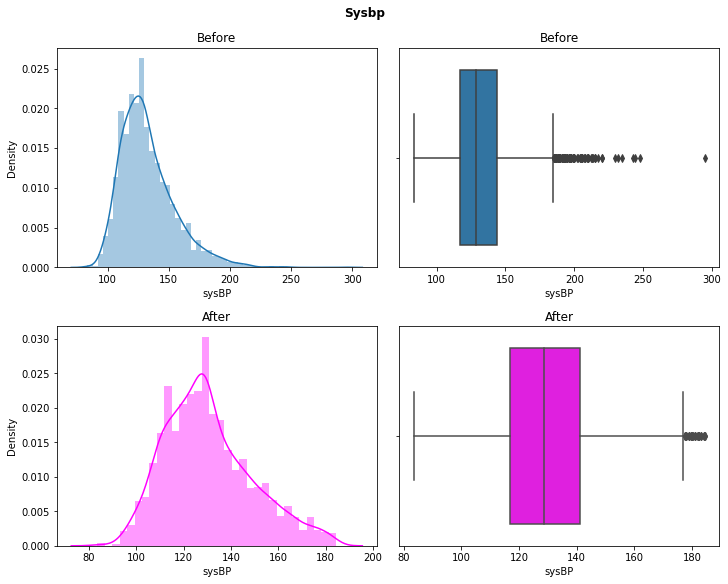

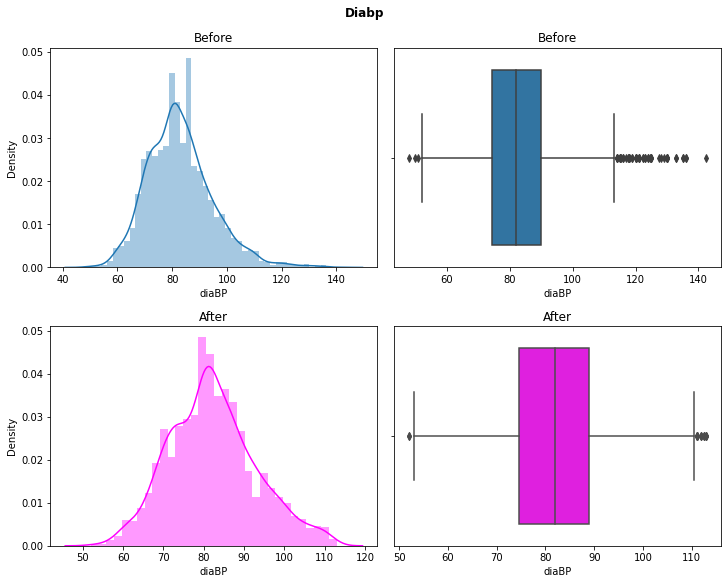

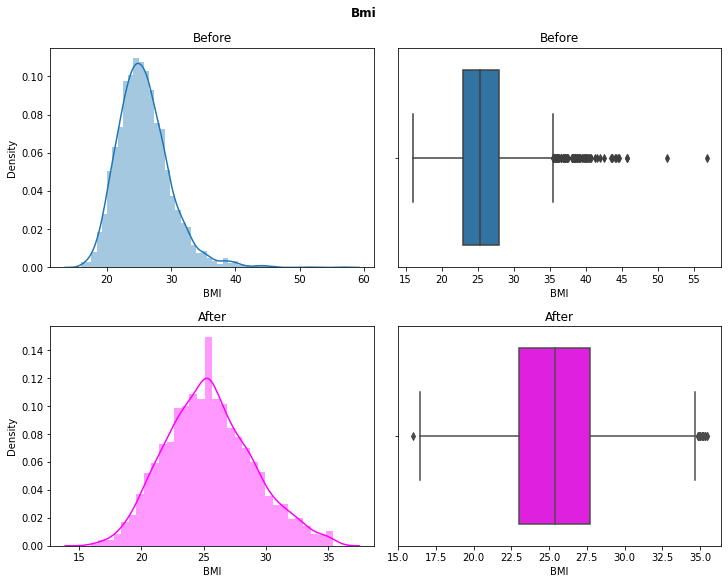

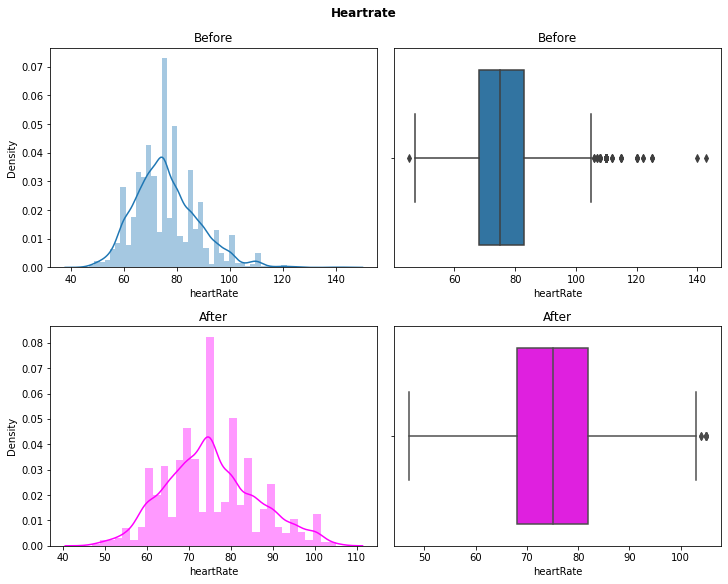

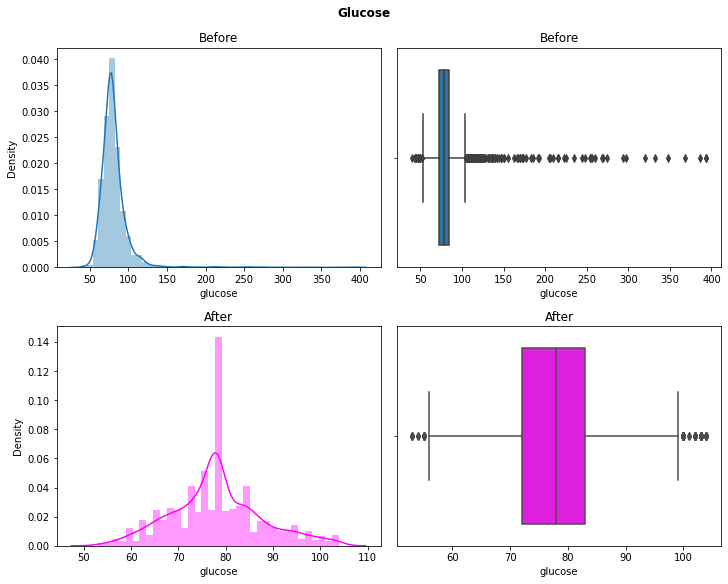

In [35]:
# Plotting Graphs Before treating outliers 
for col in numeric_features:
  fig, ax =plt.subplots(2, 2 , constrained_layout=True)
  fig.set_size_inches(10, 8)
  sns.distplot(heart_df[col], ax=ax[0][0]).set(title="Before")
  sns.boxplot(heart_df[col], ax=ax[0][1]).set(title="Before")
  # After treating outliers
  sns.distplot(df[col], ax=ax[1][0], color = 'magenta').set(title="After")
  sns.boxplot(df[col], ax=ax[1][1], color = 'magenta').set(title="After")
  plt.suptitle(f'{col.title()}',weight='bold')
  fig.show()

<b> We can now see that, the distribution has been made comparitively normal than earlier and outliers were removed upto an extent.

#**Univariate Analysis**#

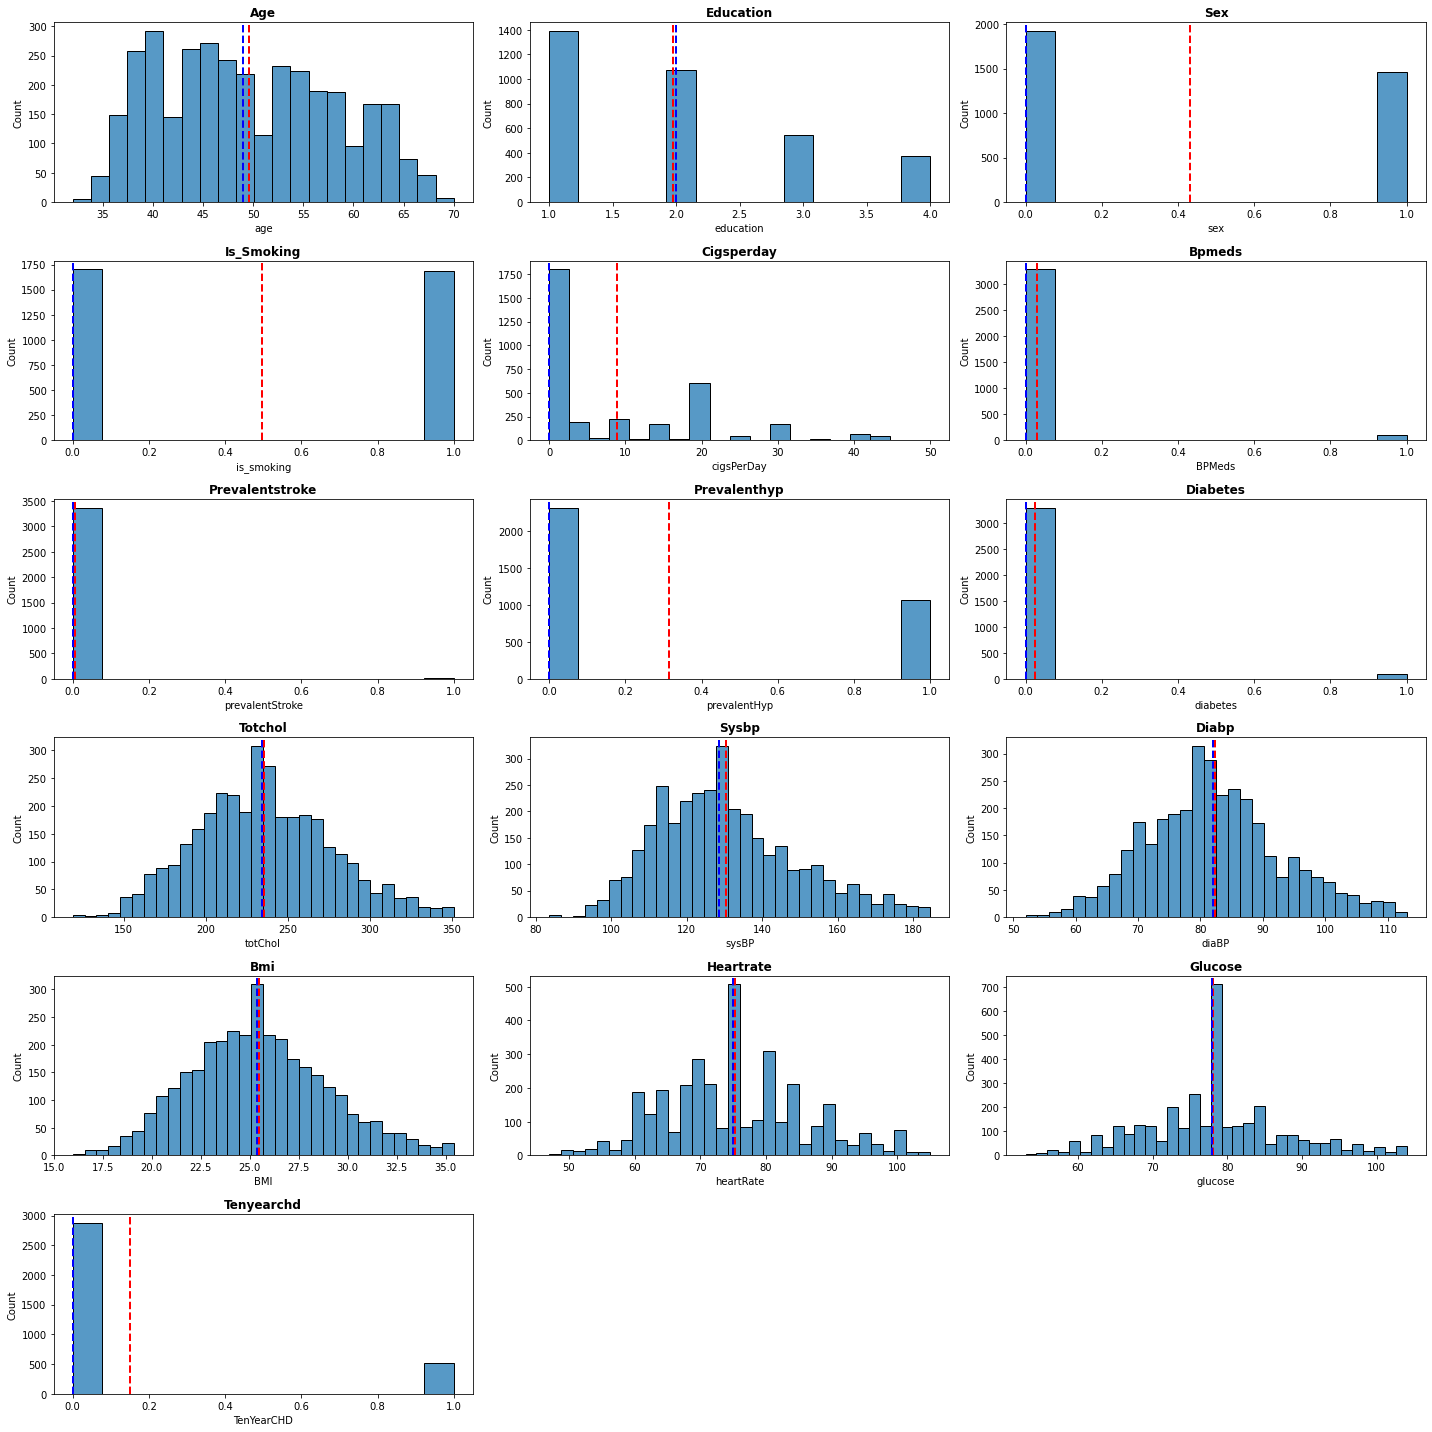

In [36]:
#Visualization of the mean and median for all the features
plt.figure(figsize=(20,20))
for n, column in enumerate(df.columns):
  feature = df[column]
  ax=plt.subplot(6,3,n+1)
  sns.histplot(feature)
  ax.axvline(feature.mean(),color = 'red', linestyle = 'dashed', linewidth=2)
  ax.axvline(feature.median(), color = 'blue', linestyle = 'dashed', linewidth = 2)
  plt.title(f'{column.title()}', weight = 'bold')
  plt.tight_layout()

#**Bivariate Analysis**#

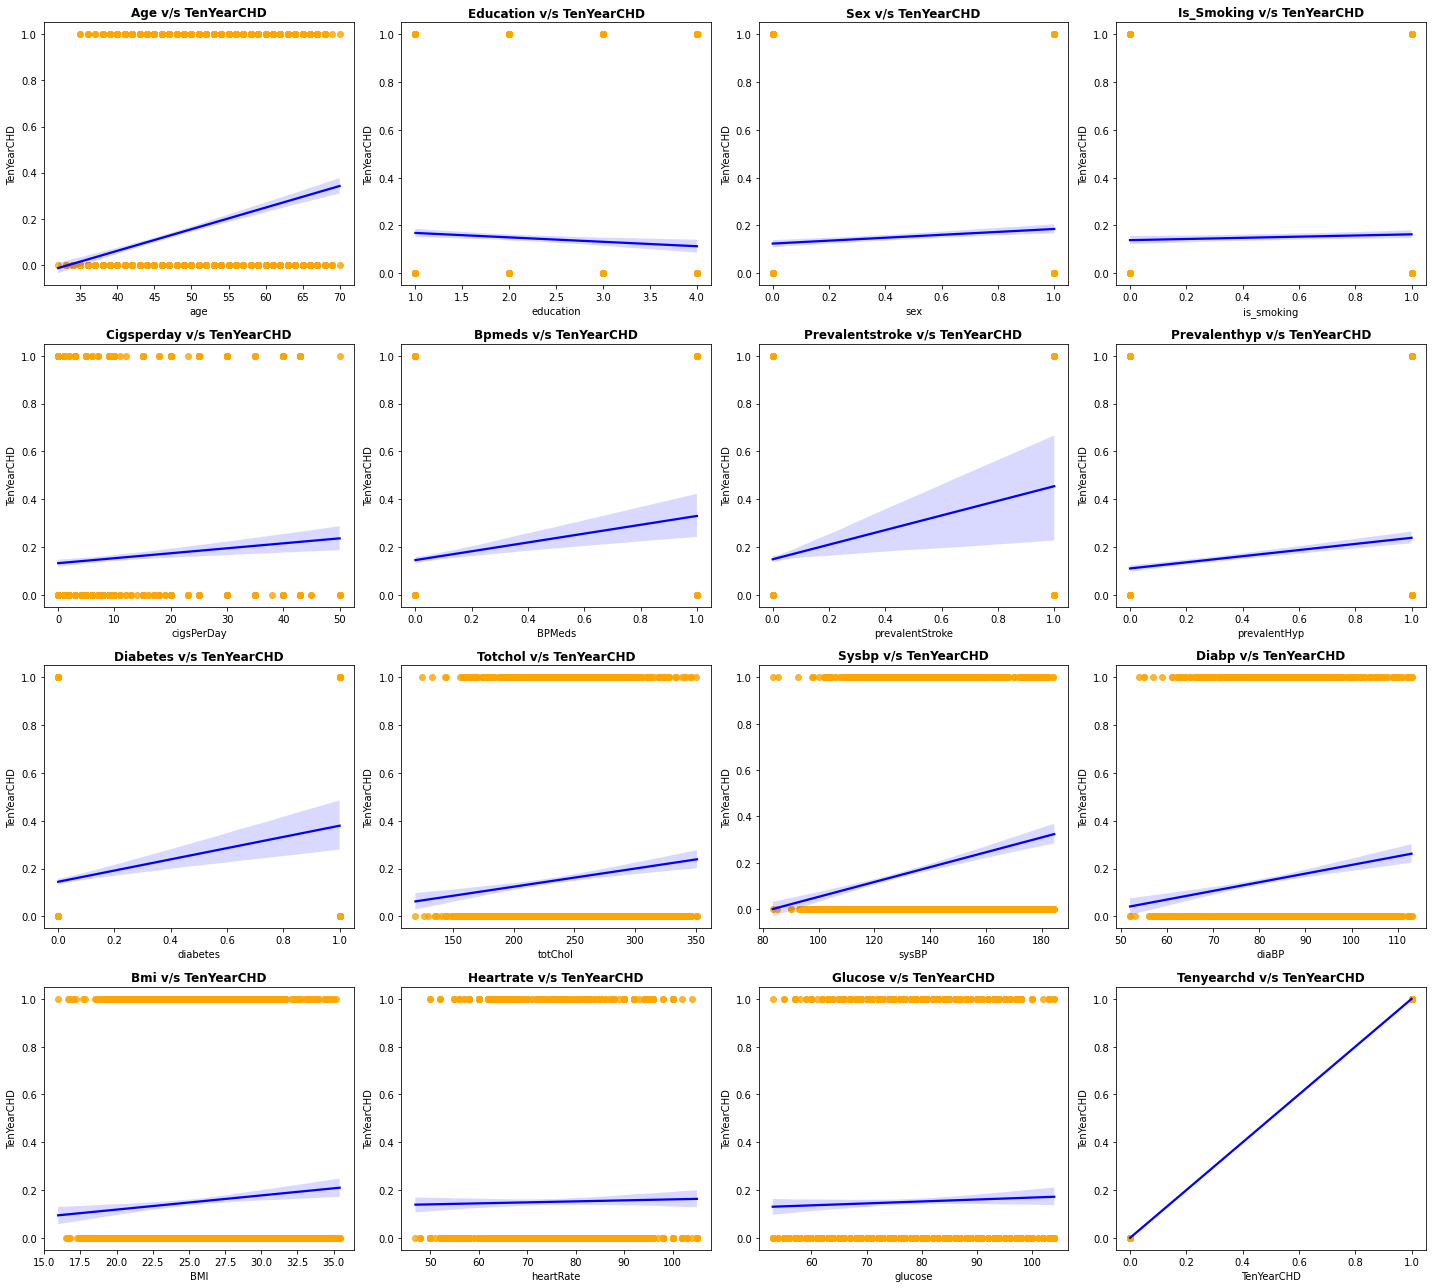

In [37]:
# Checking Linearity of independent variables with target variable
iv = [i for i in df.columns if i not in ['TenYearCHD']]
plt.figure(figsize=(20,18))
for n,column in enumerate(df.columns):
  plt.subplot(4,4,n+1)
  sns.regplot(x=df[column], y=df['TenYearCHD'],scatter_kws={"color": 'orange'},  line_kws={'color':'blue'})
  plt.title(f'{column.title()} v/s TenYearCHD',weight='bold')
  plt.tight_layout()

<b> From the above plot it is clear that, except for Education, most of the features are almost positively realted to the target variable. 

#**Removing Multicolinearity**#

In [38]:
# Defining a function to calculate Variance Inflation factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif.sort_values(by='VIF',ascending=False).reset_index(drop=True))

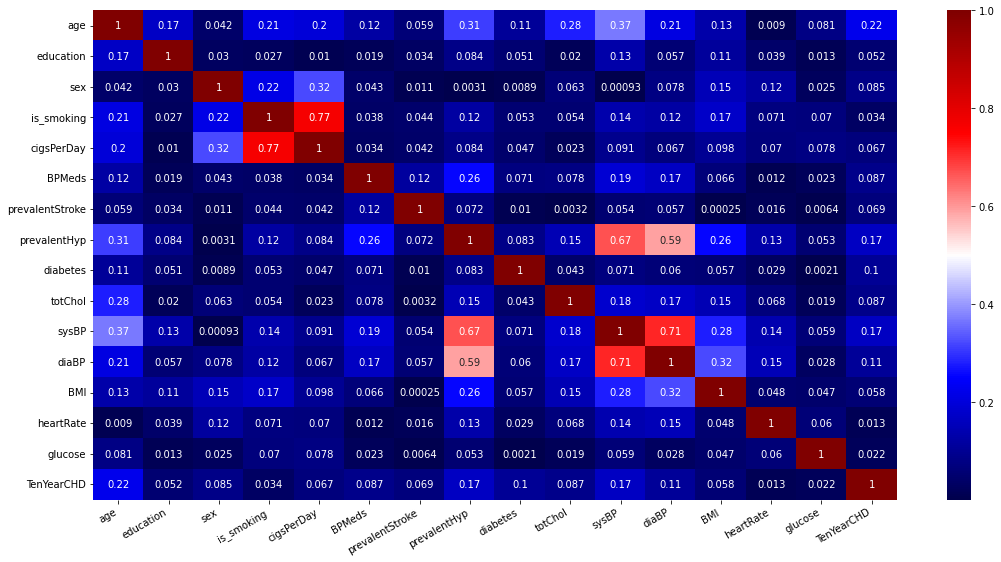

In [39]:
# Checking corelations
plt.figure(figsize=(18,9))
plot=sns.heatmap(abs(df.corr()), cmap='seismic', annot=True,)
plot.set_xticklabels(plot.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

* We can see that some variables are higly corealted.
* It can be observed that systolic blood pressure and diastolic blood pressure are highly realted and they have a value of of 0.71.
* There is also a high corelation between cigsPerDay and is_smoking. Similar relation can be witnessed for prevalentHyp with systolic blood pressure(sysBP) and diastolic blood pressure(diaBP).
* We need to remove some of these variable so as to reduce the colinearity between independent variables. 

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#checking vif for each vvariable
independent_variables = [i for i in df.columns if i not in ['TenYearCHD']]
calc_vif(df[independent_variables])

,variables,VIF
0,sysBP,132.679399
1,diaBP,127.335444
2,BMI,58.839938
3,glucose,55.695887
4,heartRate,47.760133
5,age,42.764967
6,totChol,37.646845
7,is_smoking,4.955409
8,education,4.831856
9,cigsPerDay,4.195606


<b> The ideal value of VIF should be between 1 and 10. So here we have to remove those variables that not highly important as far as model building is concerned.

In [41]:
#Removing the variables who are highly correlated to each other 
independent_variables = [i for i in df.columns if i not in[ 'glucose','sysBP','diaBP', 'BMI', 'heartRate','totChol','TenYearCHD', 'is_smoking']]
calc_vif(df[independent_variables])

,variables,VIF
0,age,5.513455
1,education,4.100370
2,sex,1.968156
3,cigsPerDay,1.733136
4,prevalentHyp,1.686226
5,BPMeds,1.120401
6,diabetes,1.044716
7,prevalentStroke,1.024945


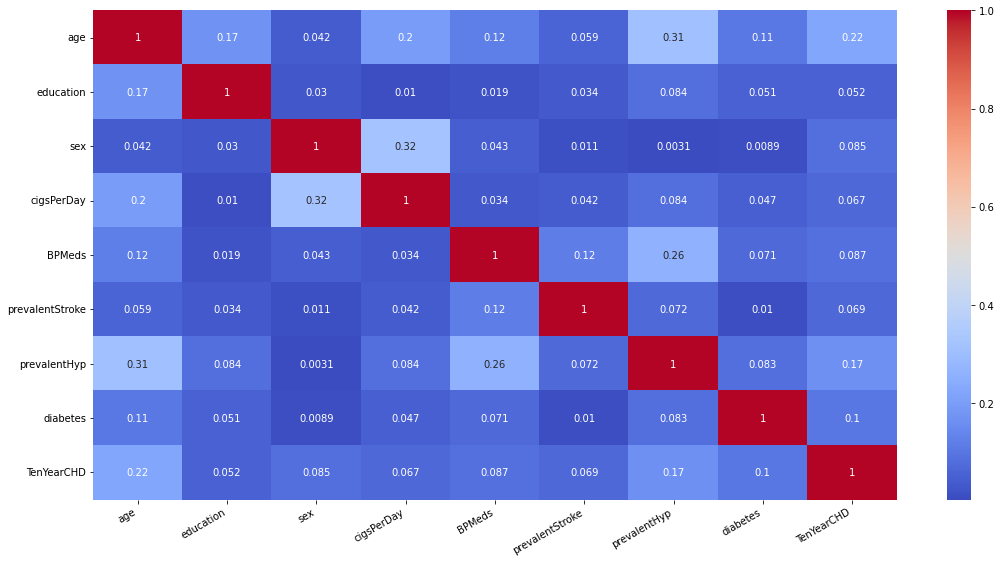

In [42]:
#Updated Dataset
dataset = df[independent_variables + ['TenYearCHD']]

#Checking correlation
plt.figure(figsize=(18,9))
plot=sns.heatmap(abs(dataset.corr()), annot=True, cmap='coolwarm')
plot.set_xticklabels(plot.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

#**Model Building**#

In [43]:
'''
#Defining variables required
scaler = MinMaxScaler()
# Splitting the data into train and test
X = scaler.fit_transform(df[independent_variables])
y = df['TenYearCHD']
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0)
'''

"\n#Defining variables required\nscaler = MinMaxScaler()\n# Splitting the data into train and test\nX = scaler.fit_transform(df[independent_variables])\ny = df['TenYearCHD']\nX_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0)\n"

In [44]:
#Defininf independent and dependent variable before splitting
X = df[independent_variables]
y = df['TenYearCHD']

In [45]:
#importing SMote to make our dataset balanced
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
X_smote, y_smote = smote.fit_resample(X,y)

print('Original dataset shape', len(df))
print('Resampled dataset shape', len(y_smote))

#Checking Value counts for both classes Before and After handling Class Imbalance:
for col,label in [[y,"Before"],[y_smote,'After']]:
  print(label +' Handling Class Imbalace:')
  print(col.value_counts(),'\n')

Original dataset shape 3390
Resampled dataset shape 5758
Before Handling Class Imbalace:
0    2879
1     511
Name: TenYearCHD, dtype: int64 

After Handling Class Imbalace:
1    2879
0    2879
Name: TenYearCHD, dtype: int64 



In [46]:
#Splitting the data into train and test
#X = scaler.fit_transform(df[independent_variables])
#y = df['TenYearCHD']
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size = 0.2, random_state = 4)

#Handling class imbalance by oversampling followed by removing the Tomek link
#X_smote, y_smote = SMOTETomek(random_state=4).fit_resample(X_train, y_train)



In [47]:
#Scaling
from sklearn.preprocessing import StandardScaler,MinMaxScaler,PowerTransformer
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#**Defining the function without CV and Hyperparameter Tuning**

In [ ]:
#Creating an empty list for storing scoring metrics
train_accuracy_sco = []
test_accuracy_sco = []
train_roc_sco = []
test_roc_sco = []
train_f1_sco = []
test_f1_sco = []
train_precision_sco = []
test_precision_sco = []
train_recall_sco = []
test_recall_sco = []

In [ ]:
# Defining the function (without Cv and Hyperparameter tuning)
def matrix_without_hp(x_train,x_test,y_train,y_true):
  Log = LogisticRegression()
  SGD = SGDClassifier()
  svc = SVC()
  KNN = KNeighborsClassifier()
  DSTree = DecisionTreeClassifier()
  RFC = RandomForestClassifier()
  GBC = GradientBoostingClassifier()
  XGBC = XGBClassifier(silent=True)

  models = [Log, SGD, svc, KNN, DSTree, RFC, GBC, XGBC]

  for i in models:
    i.fit(X_train,y_train)
    train_pred = i.predict(X_train)
    test_pred = i.predict(X_test)

    # accuracy score
    train_accuracy = accuracy_score(y_train,train_pred)
    test_accuracy = accuracy_score(y_true,test_pred)
    
    # Precision score
    train_precision = precision_score(y_train,train_pred)
    test_precision = precision_score(y_true,test_pred)
    
    #recall Score
    train_recall = recall_score(y_train,train_pred)
    test_recall = recall_score(y_true,test_pred)
    
    # F1 score
    train_f1 = f1_score(y_train,train_pred)
    test_f1 = f1_score(y_true,test_pred)
    
    # ROC_AUC Score
    train_roc = roc_auc_score(y_train,train_pred)
    test_roc = roc_auc_score(y_true,test_pred)
    

    train_accuracy_sco.append(train_accuracy)
    test_accuracy_sco.append(test_accuracy)
    train_precision_sco.append(train_precision)
    test_precision_sco.append(test_precision)
    train_recall_sco.append(train_recall)
    test_recall_sco.append(test_recall)
    train_f1_sco.append(train_f1)
    test_f1_sco.append(test_f1)
    train_roc_sco.append(train_roc)
    test_roc_sco.append(test_roc)
  

  
  scores = pd.DataFrame(list(zip(train_accuracy_sco,test_accuracy_sco,train_precision_sco,test_precision_sco,
                                 train_recall_sco,test_recall_sco,train_f1_sco,test_f1_sco,train_roc_sco,test_roc_sco )),
                        index=['Logistic Regression', 'Stochastic Gradient Descent', 'Support Vector Classifier', 'K Nearest Neighbor', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'Extreme Gradient Boosting'],
                        columns=['Train accuracy score','Test accuracy score','Train precision score','Test precision score',
                                 'Train recall score','Test recall score','Train f1 score','Test f1 score','Train roc score','Test roc score'])
  return scores
  

In [ ]:
#Defining a Fucntion without Hyperparameter and CV
def matrix_without_hp(X_train, y_train, X_test, y_test):
  Log = LogisticRegression()
  KNN = KNeighborsClassifier()
  svc = SVC()
  RFC = RandomForestClassifier()
  GBC = GradientBoostingClassifier()
  XGBC = XGBClassifier()
  DTree = DecisionTreeClassifier()
  SGD = SGDClassifier()

  models = [Log, KNN, svc, RFC, GBC, XGBC, DTree, SGD]

  for i in models:
    i.fit(X_train, y_train)
    y_pred_train = i.predict(X_train)
    y_pred_test = i.predict(y_test)

    #Accuracy score
    train_accuracy_sco = accuracy_score(y_train, y_pred_train)
    test_accuracy_sco = accuracy_score(y_test, y_pred_test)

    #Roc-auc score
    train_roc_sco = roc_auc_score(y_train, y_pred_train)
    test_roc_sco = roc_auc_score(y_test, y_pred_test)

    #F1 score
    train_f1_sco = f1_score(y_train, y_pred_train)
    test_f1_scorte = f1_score(y_train, y_pred_train)

    #Precision score 
    train_p
    